# TAREFA 3 - CNN NETWORK WITH MNIST

Para esta rede, seguimos o link do site:
Esta rede é feita a partir do keras com o tensorflow usando um modelo simples de 3 camadas, presente aqui:
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [ ]:
!pip install mnist

download data

In [ ]:
import numpy as np
import mnist
from tensorflow import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
def import_data_mnist():
    print(' ** Importing data from mnist dataset...')
    x_data = mnist.train_images()
    y_data = mnist.train_labels()
    num_classes = len(np.unique(y_data))    

    print(x_data.shape) # (60000, 28, 28)
    print(y_data.shape) # (60000,)
    print(num_classes)

    x_test = mnist.test_images()
    y_test = mnist.test_labels()
    print(' ** Normalyzing images...')
    x_data = (x_data / 255) - 0.5
    x_test = (x_test / 255) - 0.5
    print(' ** Reshaping images...')
    x_data = np.expand_dims(x_data, axis=3)
    x_test = np.expand_dims(x_test, axis=3)

    print(" ** Done!")
    print(x_data.shape) # (60000, 784)
    print(x_test.shape)  # (10000, 784)
    return [x_data, y_data, x_test, y_test, num_classes]

x_data, y_data, x_test, y_test, num_classes = import_data_mnist()

 ** Importing data from mnist dataset...
(60000, 28, 28)
(60000,)
10
 ** Normalyzing images...
 ** Reshaping images...
 ** Done!
(60000, 28, 28, 1)
(10000, 28, 28, 1)


DEFINING SOME FUNCTIONS: Roc_Graphs, to create a graph to the ROC curve, and class_choose, which will transform the y labels into true or false labels, depending on the chosen class. This should help us on multiclass classification, in order to be able to evaluate the model's predicting ability for each class.

In [ ]:
def class_choose(y_data, y_test, x):
    y_data = (y_data == x)
    y_test = (y_test == x)
    return y_data, y_test

import matplotlib.pyplot as plt

def roc_graph(fpr, tpr, x, auc):
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--') # k = color black
    plt.plot(fpr, tpr, label="predict" + str(x) + "& AUC: %.3f" % auc,
             color='C'+str(x), linewidth=3) # for color 'C'+str(j), for j[0 9]
    plt.legend(loc='lower right', ncol=1, mode="expand")
    plt.title('ROC for Character %s' % x)
    plt.xlabel('false positive rate', fontsize=14)
    plt.ylabel('true positive rate', fontsize=14)
    
    plt.savefig("ROCLensDetectNet_ch_{}.png". format(x))

Model creation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              1025000   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5

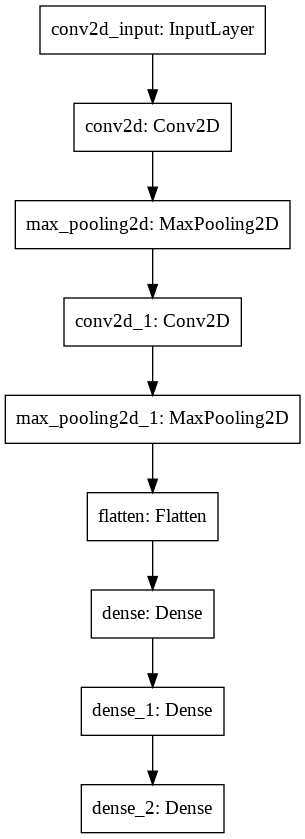

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import utils
from keras.utils import to_categorical
from IPython.display import Image, display
from keras.utils import plot_model #inception network keras python

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

############COMPILANDO O MODELO.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

plot_model(model,  to_file="model_MNIST.png")
display(Image('model_MNIST.png'))

AGORA VAMOS BOTAR PRA RODAR!

10

 ** Building model for class: 0
 ** Importing mnist dataset again for classification...
 ** Importing data from mnist dataset...
(60000, 28, 28)
(60000,)
10
 ** Normalyzing images...
 ** Reshaping images...
 ** Done!
(60000, 28, 28, 1)
(10000, 28, 28, 1)
 ** Loading model for character:  0
 ** Shapes: y_data: (60000,), y_test: (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
____________________________________________

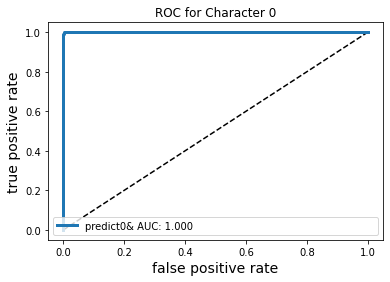

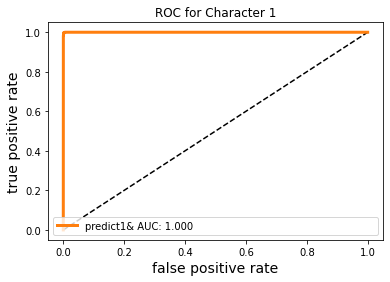

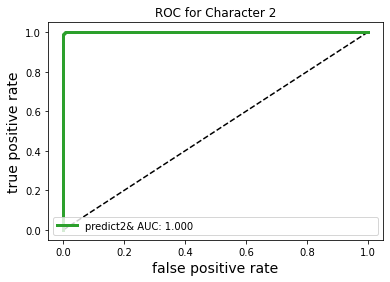

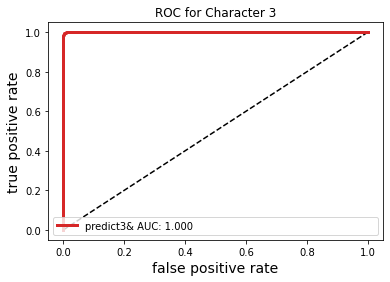

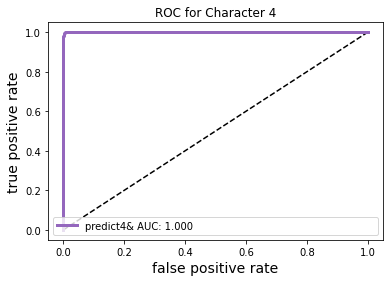

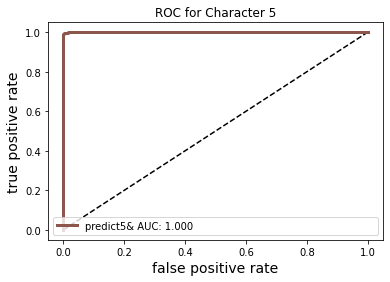

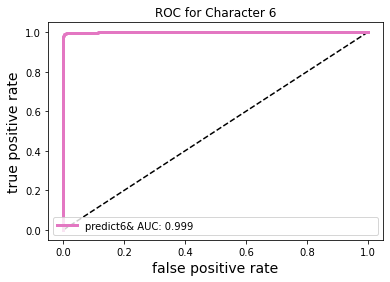

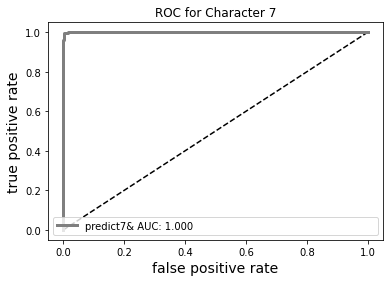

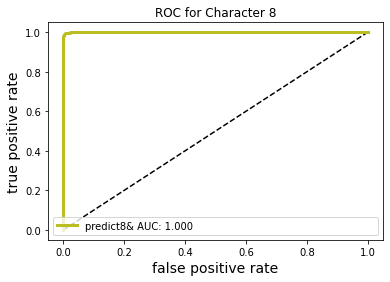

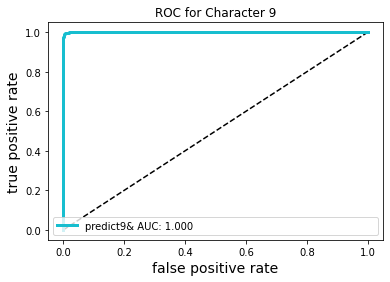

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

saved_w = model.get_weights()
print(len(saved_w))

for y in range(0,num_classes,1):
    print('\n ** Building model for class: %s' % y)
    print(' ** Importing mnist dataset again for classification...')
    x_data, y_data, x_test, y_test, num_classes = import_data_mnist()
    print(' ** Loading model for character: ', y)
    y_data, y_test = class_choose(y_data, y_test, y)
    print(' ** Shapes: y_data: %s, y_test: %s' % (y_data.shape, 
                                                  y_test.shape))
    model.set_weights(saved_w)
    model.compile(optimizer='adam',loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    model.fit(x_data, to_categorical(y_data), epochs=5,
              batch_size = 32)
    preds = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, preds[:,1])
    auc = roc_auc_score(y_test, preds[:,1])

    roc_graph(fpr, tpr, y, auc)

    loss, acc = model.evaluate(x_test, to_categorical(y_test))
    print('\n ** Loss = %s; Acc = %s.' % (loss,acc))
